#### Kemal Burak Arıboğa

#### Soru 1) One hot encoding modelin görmediği veriye nasıl uygulanır?

* One hot encoding kategorik verileri modele tanıtabilmek için kullanılır.
* sklearn.preprocessing.OneHotEncoder veya pandas.get_dummies metodlarıyla veriye uygulanabilir.

###### Örnek Uygulama:

In [1]:
#get_dummies metodu ile

import pandas as pd
#Örnek bir dataframe oluşturalım
df = pd.DataFrame({
    'City': ['Adana', 'Ankara', 'Istanbul', 'Izmir', 'Kocaeli', 'Bolu', 'Kastamonu', 'Sivas', 'Kayseri', 'Malatya'],
    'Salary': ['4000', '5000', '6000', '5000', '4000', '4000', '3000', '3500', '4400', '4000']
})

In [2]:
dummy_coding_df = pd.get_dummies(data = df[['City']], drop_first = False, sparse=False) #City sütunundaki kategorik veriler, numerik değerlere dönüştürüldü

dummy_coding_df

,City_Adana,City_Ankara,City_Bolu,City_Istanbul,City_Izmir,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Malatya,City_Sivas
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0


In [3]:
#OneHotEncoder ile

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) #encoder tanımlandı
one_hot_attributes = encoder.fit_transform(df[['City']]) #City sütunundaki attributelar numerik verilere dönüştürüldü
column_name = encoder.get_feature_names_out(['City']) #kategorik verilerin isimleri yeni dataframede gözüksün diye attributelar City sütunundan çekildi
one_hot_df =  pd.DataFrame(one_hot_attributes, columns= column_name, dtype = int) #kategorik verilerin numerik halleri ve sütun isimleri yeni bir dataframede birleştirildi

print(one_hot_df)

   City_Adana  City_Ankara  City_Bolu  City_Istanbul  City_Izmir  \
0           1            0          0              0           0   
1           0            1          0              0           0   
2           0            0          0              1           0   
3           0            0          0              0           1   
4           0            0          0              0           0   
5           0            0          1              0           0   
6           0            0          0              0           0   
7           0            0          0              0           0   
8           0            0          0              0           0   
9           0            0          0              0           0   

   City_Kastamonu  City_Kayseri  City_Kocaeli  City_Malatya  City_Sivas  
0               0             0             0             0           0  
1               0             0             0             0           0  
2               0            

#### Soru 2) Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

pollution_types = ['Air','Water','Soil','Noise','Light','Radioactive']
pollution_df = pd.DataFrame(pollution_types, columns = ['Pollution Type']) # Örnek bir dataframe oluşturuldu

labelencoder = LabelEncoder() #LabelEncoder instance'ı tanımlandı
pollution_df['Pollution Type Labels'] = labelencoder.fit_transform(pollution_df['Pollution Type']) #Labelencode ile kategorik veriler numerik değerlere dönüştü, 'Pollution Type Labels' ismindeki yeni bir sütuna aktarıldı

print(pollution_df)

  Pollution Type  Pollution Type Labels
0            Air                      0
1          Water                      5
2           Soil                      4
3          Noise                      2
4          Light                      1
5    Radioactive                      3


#### Soru 3) Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

Imbalanced bir dataset overfit veya underfit problemlerine yol açabilir.

Mücadele Taktikleri:

1) Daha Fazla Data Toplamak
    * Daha büyük bir veri seti, attributelar hakkında farklı ve belki de daha dengeli bir bakış açısı ortaya çıkarabilir.
    * Veri setinde resampling yapacağımız zaman, minör attributelara ilişkin daha fazla örnek faydalı olabilir. 


2) Performans Metriklerini Değiştirmek
    * Ölçümlerdeki (testlerdeki) isabetlilik, imbalanced datasetlerde doğru bir performans göstergesi olmayabilir.
    * Bu nedenle;
        * Confusion Matrix
        * Precision
        * Recall
        * F1 Score
        * Kappa
        * ROC Curves
    * gibi metrikler değerlendirilebilir.


3) Resampling
    * Datayı daha dengeli bir hale getirmek için resampling işlemi uygulanabilir. 2 çeşidi vardır:
        * Oversampling: Yetersiz görülen data örnekleri çoğaltılabilir.
        * Undersampling: Fazla görülen data örnekleri azaltılabilir.


4) Sentetik Veri Üretilebilir
    * Bkz. SMOTE (Synthetic Minority Over-sampling Technique.)


5) Farklı Algoritmalar Denemek
    * Decision tree algoritmaları genellikle imbalanced datalar ile iyi çalışır. Örn:
        * C4.5
        * C5.0
        * CART
        * Random Forest


6) Cezalandırmalı Algoritmalar Kullanmak
    * Belirli bir algoritmaya bağlıysak, resampling yapamıyorsak ve kötü sonuçlar alıyorsak bu yöntem faydalı olabilir. 
    * Örnek algoritmalar:
        * Penalized-SVM
        * Penalized-LDA
    * Örnek framework:
        * Weka - CostSensitiveClassifier


7) Farklı Bakış Açıları Geliştirmeye Çalışmak ve Bir Bilene Danışmak
    * Anomaly Detection: Anomaly tespiti, nadir olayların tespitidir. Bu tespitler, minor verileri outlier olarak kabul edip, bu verileri ayırmanın ve sınıflandırmanın yeni yollarını düşünmeye yardımcı olacaktır.
    * Change Detection: Sistemdeki değişimlerin tespitidir. Kişilerin uygulamayı kullanırken sergiledikleri davranış değişikliklerinin ve alım-satım işlemlerindeki değişikliklerin takibi bu başlık altında yapılabilir.
    * Quora ve StackOverFlow kullanmak: Bu platformlarda sorularımızı araştırdığımızda veya yeni soru sorduğumuzda gelen cevaplardan birçok yeni şey öğrenebiliriz. Örn cevaplar: 
        1) "Decompose your larger class into smaller number of other classes…" 
        2) "…use a One Class Classifier… (e.g. treat like outlier detection)"
        3) "…resampling the unbalanced training set into not one balanced set, but several. Running an ensemble of classifiers on these sets could produce a much better result than one classifier alone"

#### Soru 4) Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

Score:  0.422068878563843


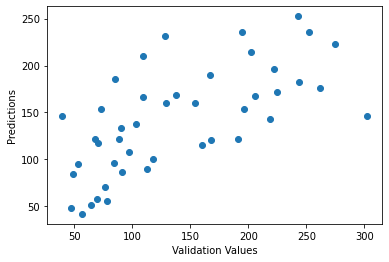

In [5]:
# Scikit-learn'de yer alan train_test_split metodunu 2 kere kullanarak bu işlemi gerçekleştirebiliriz.

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Örnek dataset olarak diyabet datasetini kullanalım

# df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
# df_diabetes['target'] = pd.Series(diabetes.target)
# df_diabetes.head()

columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Kullanacağımız sütun isimlerini belirttik
diabetes = datasets.load_diabetes() # Scikit-learnden diyabet datasetini çağırdık
df = pd.DataFrame(diabetes.data, columns=columns) # Diyabet verisetinden çekmek istediğimiz sütunlarla pandas dataframei oluşturduk
y = diabetes.target # predict etmek istediğimiz sütunu belirledik

# İlk adımda dataset'i %80 training ve %20 geri kalan olarak ayırıyoruz.

X_train, X_remain, y_train, y_remain = train_test_split(df,y, train_size=0.8)

# Artık geri kalan datayı %50, %50 paylaştırıp, %10 validation ve %10 test dataset elde edebiliriz

X_valid, X_test, y_valid, y_test = train_test_split(X_remain,y_remain, test_size=0.5)

lm = linear_model.LinearRegression() # Linear Regression modeli seçtik
model = lm.fit(X_train, y_train) # X_train ve y_train dataları ile modeli train ettik
predictions = lm.predict(X_valid) # X_valid üzerinden predict ettik

# print("predictions 0-5: ", predictions[0:5])

# Sonuçlarımızı grafiğe dökelim:

plt.xlabel("Validation Values")
plt.ylabel("Predictions")
plt.scatter(y_valid, predictions) #

print("Score: ", model.score(X_valid, y_valid))

# Artık validation datasetimiz ile train datasetimiz üzerinde hyperparameter tuning yapabilir ve test datasetimiz ile kıyaslayabiliriz


#### Soru 5) predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

#2D classification veriseti oluşturmak için make_blobs'u import ettik
ds = make_blobs(n_samples=100, centers=2, n_features=2, random_state=2) #2D classification dataset oluşturduk
X = ds[0]
y = ds[1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=2)

model = LogisticRegression() #Model olarak Logistic Regression seçtik
model.fit(X, y) #Model'i train ettik

y_predicted = model.predict(X_test) # normal prediction
y_predicted_proba = model.predict_proba(X_test) # probability prediction, burada threshold seviyemiz default olarak 0.5
y_predicted_proba_threshold = (model.predict_proba(X_test)[:,1] >= 0.9).astype(int) # 0.9 threshold ile probability prediction

# print("X_test: \n", X_test, "\n")
print("y_test: \n", y_test, "\n")
print("y_predicted: \n", y_predicted, "\n")
# print("y_predicted_proba: \n", y_predicted_proba, "\n")
print("y_predicted_proba_threshold: \n", y_predicted_proba_threshold, "\n")

y_test: 
 [1 1 0 0 0 0 0 0 0 1] 

y_predicted: 
 [1 1 0 0 0 0 0 0 0 1] 

y_predicted_proba_threshold: 
 [1 1 0 0 0 0 0 0 0 1] 

